In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt

from sklearn import set_config

pd.set_option('display.max_rows', 500)

set_config(display="diagram")
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.base import TransformerMixin, BaseEstimator

from itertools import combinations

from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    MinMaxScaler,
)

from sklearn.model_selection import train_test_split

from joblib import dump, load

#https://analyticsindiamag.com/7-types-classification-algorithms/
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)
from sklearn.ensemble import RandomForestClassifier

from collections import Counter

from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (f1_score,precision_score,accuracy_score,recall_score)
from sklearn.metrics import confusion_matrix,classification_report

                                
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.options.display.max_columns = 100
sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [2]:
# ouverture du dataframe
input_path_train = r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\input\\df_train.csv'
input_path_test = r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\input\\df_test.csv'

In [4]:
df_sample_train = pd.read_csv(input_path_train).sample(frac = 0.10)
df_sample_test = pd.read_csv(input_path_test).sample(frac = 0.10)

In [5]:
df_sample_train.to_csv( r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\input\\df_train_sample.csv')
df_sample_test.to_csv( r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\input\\df_test_sample.csv')

In [6]:
df_sample_train.head()

,Unnamed: 0,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,...,PREV_NAME_GOODS_CATEGORY_nan_MEAN,PREV_NAME_PORTFOLIO_Cash_MEAN,PREV_NAME_PORTFOLIO_nan_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_PRODUCT_TYPE_x-sell_MEAN,PREV_NAME_PRODUCT_TYPE_nan_MEAN,PREV_CHANNEL_TYPE_Country-wide_MEAN,PREV_CHANNEL_TYPE_Credit and cash offices_MEAN,PREV_CHANNEL_TYPE_Regional / Local_MEAN,PREV_CHANNEL_TYPE_Stone_MEAN,PREV_CHANNEL_TYPE_nan_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_SELLER_INDUSTRY_Consumer electronics_MEAN,PREV_NAME_SELLER_INDUSTRY_nan_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_NAME_YIELD_GROUP_middle_MEAN,PREV_NAME_YIELD_GROUP_nan_MEAN,PREV_PRODUCT_COMBINATION_POS household with interest_MEAN,PREV_PRODUCT_COMBINATION_POS household without interest_MEAN,PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN,APPROVED_AMT_APPLICATION_MAX,APPROVED_AMT_APPLICATION_MEAN,APPROVED_CNT_PAYMENT_MEAN,APPROVED_CNT_PAYMENT_SUM,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_DEF_MAX,POS_NAME_CONTRACT_STATUS_nan_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_SUM
70778,70780,70780,182097,0.0,1,0,0,2,157500.0,225000.0,22050.0,-14814,-1386.000000,-8819.0,-4918,1,1,1,1,1,0,1,12,0,1,1,0,1,1,0.718721,0.539106,0.0,0.0,-1191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.333333,0.000000,0.666667,0.0,0.666667,0.333333,0.000000,218007.0,149976.000000,14.000000,42.0,43.0,0.0,0.0,0.0,4.0,0.0,0.000000,0.0,51.0,14.952381,628.0,2.542068,1.052156,0.000,-1368.857143,-57492.00,4.022231e+07,34875.765,10754.362500,451683.225,6371.145,-217.0,-25138.0
132380,132383,132383,253543,0.0,1,1,0,1,171000.0,283585.5,18252.0,-12924,-305.000000,-2152.0,-5066,1,1,0,1,0,0,2,16,0,0,0,0,0,0,0.370701,0.504674,6.0,1.0,-2349.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.200000,0.200000,0.000000,0.600000,0.0,0.600000,0.000000,0.0,0.200000,0.4,0.000000,0.200000,0.200000,0.0,0.000000,0.000000,0.000000,193500.0,80943.750000,8.500000,34.0,32.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,29.0,13.655172,396.0,1.000000,1.000000,0.000,0.000000,0.00,0.000000e+00,15862.140,8310.562759,241006.320,4771.620,-31.0,-42502.0
41826,41828,41828,148430,0.0,1,0,0,1,225000.0,943425.0,27715.5,-11281,-2592.000000,-1720.0,-3726,1,1,0,1,0,0,2,12,0,0,0,0,0,0,0.504337,0.824595,0.0,0.0,-2662.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.285714,0.0,0.000000,0.428571,0.0,0.285714,0.571429,0.000000,0.142857,0.0,0.000000,0.428571,0.0,0.428571,0.0,0.142857,0.428571,0.000000,0.0,0.142857,0.142857,0.000000,373500.0,202621.500000,24.000000,120.0,140.0,0.0,0.0,0.0,3.0,0.0,0.000000,0.0,144.0,12.319018,2008.0,1.000000,0.993

In [ ]:
# ouverture du dataframe
input_path = r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\input\\df_train.csv'

In [5]:
def transform_numerical_to_categorical(df):
    
    category_features = []
    threshold = 2
    for each in df.columns:
        if df[each].nunique() <= threshold:
            category_features.append(each)

    print("transformed from numerical to categorical : ",category_features)   


    for each in category_features:
        df[each] = df[each].astype('category')

    obj_col = df.select_dtypes("object").columns
    for each in obj_col:
        df[each] = df[each].astype('category')
    
    return df 

In [6]:
def my_train_test_split(data):
    
    # train test split
    target = data['TARGET'].astype('int')
    data.drop(columns = ['TARGET'], inplace = True)
    
        
    x_train, x_test, y_train, y_test = train_test_split(data,target, train_size=0.8, random_state = 42)

    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    return  x_train, x_test, y_train, y_test
    

In [7]:
def processed_data(df):
    # definition des transformers

    ss = MinMaxScaler()
    #ss = StandardScaler()
    #pca = PCA(n_components="mle")


    # definition des groupes de feature qui vont subir les même transformation
    cat_vars = df.select_dtypes("category").columns
    num_vars = df.select_dtypes(include=np.number).columns


    # Creation des pipeline de transformation
    numeric_pipe = Pipeline([("ss", ss)])


    # Creation des columnTransformer
    col_transformer = ColumnTransformer(
        transformers=[
            ("nums", numeric_pipe, num_vars),
            #("cats", numeric_pipe, cat_vars),
            ('columns_to_keep', "passthrough", cat_vars)
        ],
        remainder="drop",
        n_jobs=None,
    )
    # creation de différent pipe pour trouver la meilleur combinaison
    data_pipe = Pipeline([("col_transformer", col_transformer)])
    #data_pipe_PCA = Pipeline([("col_transformer", col_transformer,("pca", pca))])
    
    return data_pipe

In [8]:
def prepare_data_for_modelisation(input_path, fract):
    
    df = pd.read_csv(input_path)
    df = df.sample(frac = fract)
    nan_cols = [i for i in df.columns if df[i].isnull().any()]
    df.drop(columns = nan_cols, inplace = True)
    df = df.loc[:,~df.columns.str.startswith('Unnamed')]
    df = df[df['TARGET'].notnull()]
    df.drop(columns = ['SK_ID_CURR','index'], inplace = True)
    
    df = transform_numerical_to_categorical(df)
    
    x_train, x_test, y_train, y_test = my_train_test_split(df)
    
   
  
    
    return x_train, x_test, y_train, y_test

In [9]:
x_train, x_test, y_train, y_test = prepare_data_for_modelisation(input_path, 0.5)

transformed from numerical to categorical :  ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Sp

In [10]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

#very imbalanced data

{0: 113123, 1: 9880}

In [ ]:
def selection_modele(x_train, y_train,x_test, y_test, data_pipe, c_weight = None):
    
    model = {'LR' : LogisticRegression(class_weight = c_weight),
            'SGD' : SGDClassifier(class_weight = c_weight),
            'RFR' : RandomForestClassifier(class_weight = c_weight),
            'XGB' : XGBClassifier(scoring='roc_auc')
            }

    for k,v in model.items():
        pipe = Pipeline(
            [
                ("data_pipe", data_pipe),
                ("clf", v),
            ]
        )
        pipe.fit(x_train, y_train)

        # prediction
        y_pred = np.array(pipe.predict(x_test))

        # scoring
        print(F"scoring du modèle : {v} \n")
        print(classification_report(y_test, y_pred),"\n")

        df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))
        plt.figure(figsize=(10,7))
        sns.set(font_scale=1.4) # for label size
        sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

        plt.show()
        print("\n")

# Choix de la methode d'entrainement

### Class_weight

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scoring du modèle : LogisticRegression(class_weight='balanced') 

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     28312
           1       0.17      0.71      0.27      2439

    accuracy                           0.70     30751
   macro avg       0.57      0.70      0.54     30751
weighted avg       0.90      0.70      0.77     30751
 



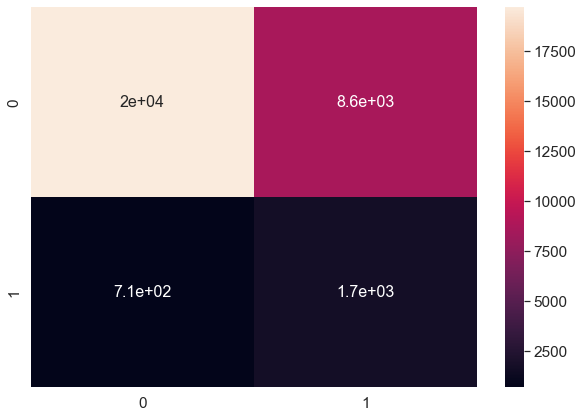



scoring du modèle : SGDClassifier(class_weight='balanced') 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     28312
           1       0.21      0.53      0.30      2439

    accuracy                           0.81     30751
   macro avg       0.58      0.68      0.60     30751
weighted avg       0.89      0.81      0.84     30751
 



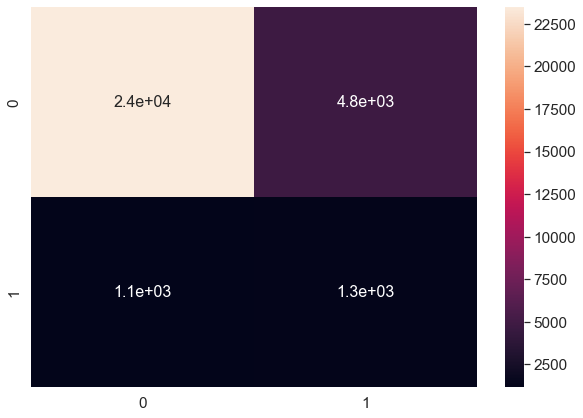



scoring du modèle : RandomForestClassifier(class_weight='balanced') 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28312
           1       0.67      0.00      0.00      2439

    accuracy                           0.92     30751
   macro avg       0.79      0.50      0.48     30751
weighted avg       0.90      0.92      0.88     30751
 



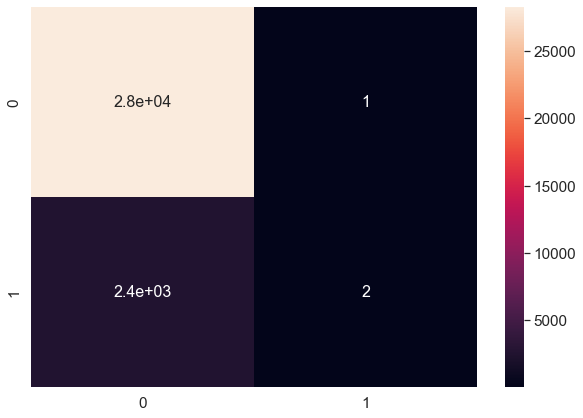

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
scoring du modèle : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learnin

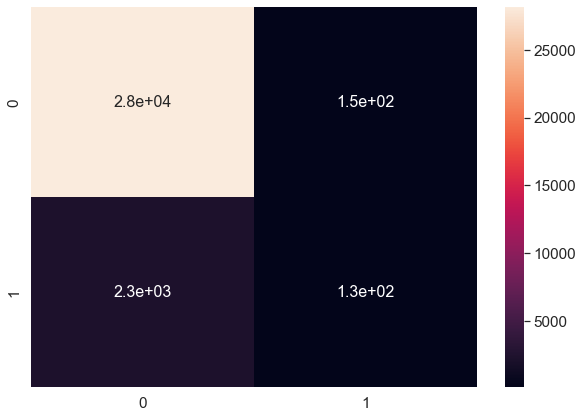

In [92]:
selection_modele(x_train, y_train, x_test, y_test, data_pipe, c_weight = 'balanced')

### random under sampling

In [93]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 112996, 1: 10007})
Resample dataset shape Counter({0: 10007, 1: 10007})


c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scoring du modèle : LogisticRegression() 

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     28312
           1       0.17      0.71      0.27      2439

    accuracy                           0.69     30751
   macro avg       0.57      0.70      0.54     30751
weighted avg       0.90      0.69      0.76     30751
 



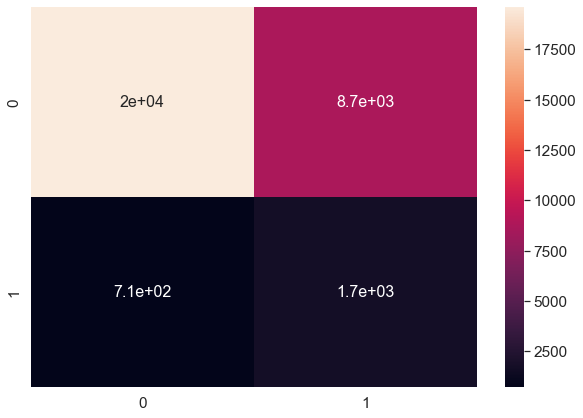



scoring du modèle : SGDClassifier() 

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     28312
           1       0.19      0.58      0.29      2439

    accuracy                           0.77     30751
   macro avg       0.57      0.69      0.58     30751
weighted avg       0.90      0.77      0.82     30751
 



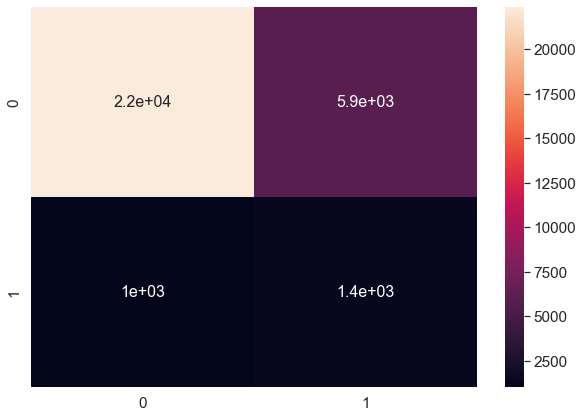



scoring du modèle : RandomForestClassifier() 

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     28312
           1       0.16      0.70      0.25      2439

    accuracy                           0.67     30751
   macro avg       0.56      0.69      0.52     30751
weighted avg       0.90      0.67      0.75     30751
 



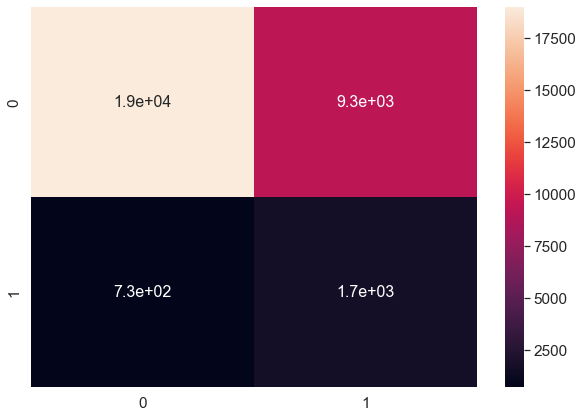

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:23:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
scoring du modèle : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learnin

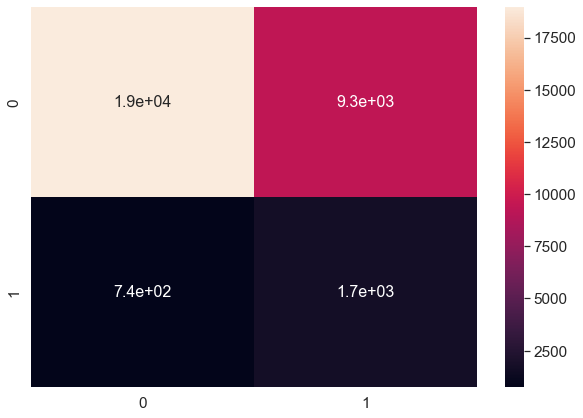

In [94]:
selection_modele(x_rus, y_rus, x_test, y_test, data_pipe, c_weight = None)

In [95]:
del x_rus
del y_rus

### SMOTE

In [96]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.7)

# fit predictor and target variable
x_smote, y_smote = sm.fit_resample(np.array(x_train), y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 112996, 1: 10007})
Resample dataset shape Counter({0: 112996, 1: 79097})


In [97]:
x_smote = pd.DataFrame(columns = x_train.columns, data = x_smote)

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scoring du modèle : LogisticRegression() 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     28312
           1       0.20      0.58      0.30      2439

    accuracy                           0.78     30751
   macro avg       0.58      0.69      0.58     30751
weighted avg       0.90      0.78      0.83     30751
 



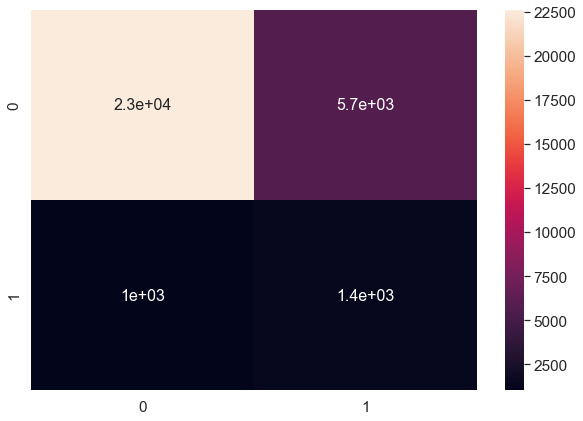



scoring du modèle : SGDClassifier() 

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     28312
           1       0.16      0.73      0.26      2439

    accuracy                           0.67     30751
   macro avg       0.56      0.70      0.52     30751
weighted avg       0.90      0.67      0.75     30751
 



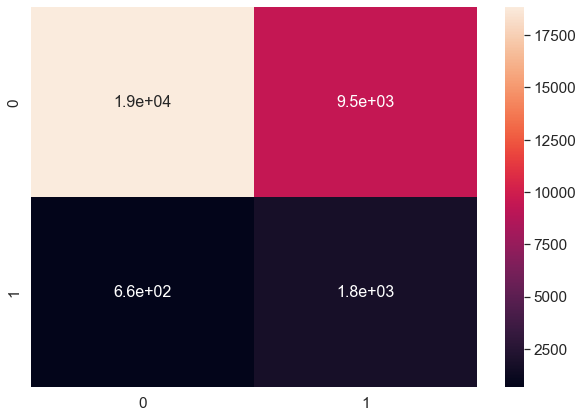



scoring du modèle : RandomForestClassifier() 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28312
           1       1.00      0.00      0.00      2439

    accuracy                           0.92     30751
   macro avg       0.96      0.50      0.48     30751
weighted avg       0.93      0.92      0.88     30751
 



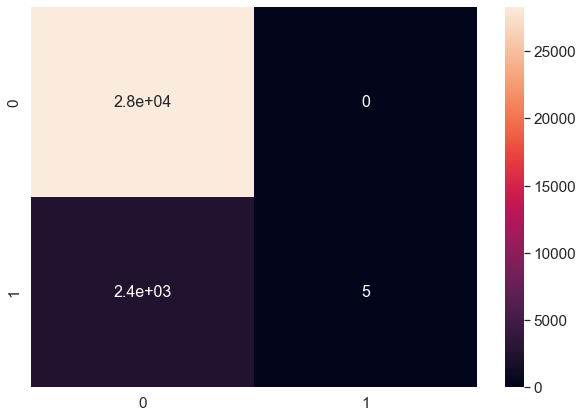

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
scoring du modèle : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learnin

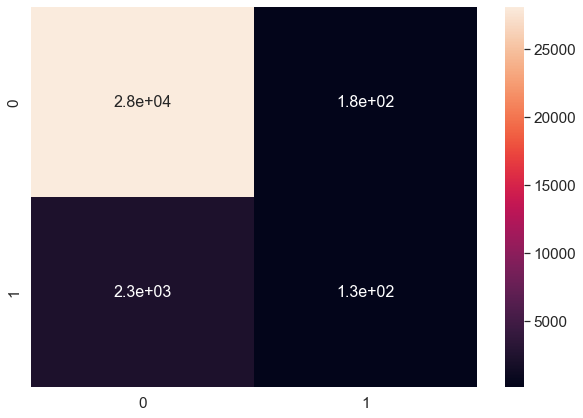

In [98]:
selection_modele(x_smote, y_smote, x_test, y_test, data_pipe, c_weight = None)

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scoring du modèle : LogisticRegression(class_weight='balanced') 

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     28312
           1       0.17      0.69      0.27      2439

    accuracy                           0.70     30751
   macro avg       0.57      0.70      0.54     30751
weighted avg       0.90      0.70      0.77     30751
 



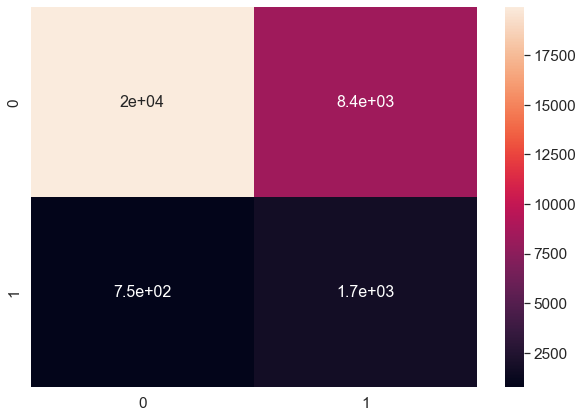



scoring du modèle : SGDClassifier(class_weight='balanced') 

              precision    recall  f1-score   support

           0       0.97      0.64      0.77     28312
           1       0.15      0.76      0.25      2439

    accuracy                           0.65     30751
   macro avg       0.56      0.70      0.51     30751
weighted avg       0.90      0.65      0.73     30751
 



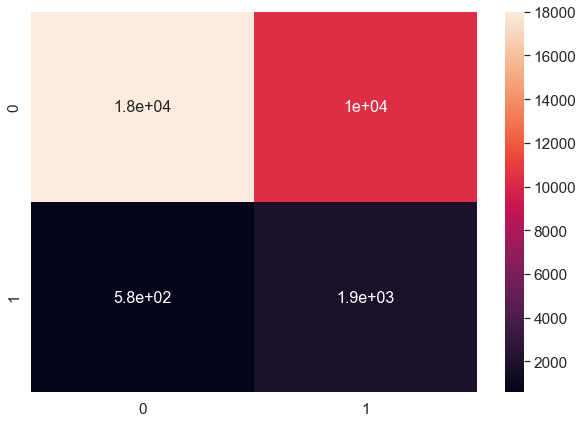



scoring du modèle : RandomForestClassifier(class_weight='balanced') 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28312
           1       0.75      0.00      0.00      2439

    accuracy                           0.92     30751
   macro avg       0.84      0.50      0.48     30751
weighted avg       0.91      0.92      0.88     30751
 



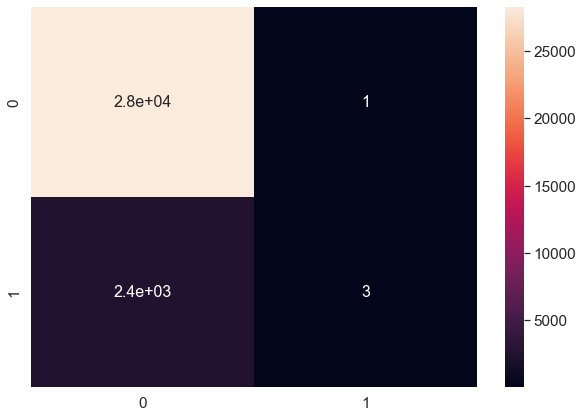

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
scoring du modèle : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learnin

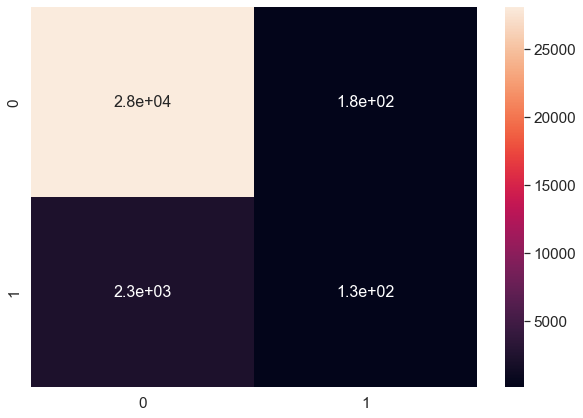

In [99]:
selection_modele(x_smote, y_smote, x_test, y_test, data_pipe, c_weight = 'balanced')

In [100]:
del x_smote
del y_smote

# choix modele lr 

In [9]:
x_train, x_test, y_train, y_test, data_pipe = prepare_data_for_modelisation(input_path, 0.10)

transformed from numerical to categorical :  ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Sp

ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
x_train.shape,x_test.shape

In [ ]:
cat_vars = x_train.select_dtypes("category").columns
num_vars = [col for col in x_train.select_dtypes(include=np.number).columns if 'id' not in col.lower()]

In [ ]:
# definition des transformers 

ss = MinMaxScaler()
#ss=StandardScaler()
pca = PCA()


# definition des groupes de feature qui vont subir les même transformation
cat_vars = x_train.select_dtypes("category").columns
num_vars = [col for col in x_train.select_dtypes(include=np.number).columns if 'id' not in col.lower()]


# Creation des pipeline de transformation
numeric_pipe = Pipeline([("ss", ss)])


# Creation des columnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ("nums", numeric_pipe, num_vars),
        ('columns_to_keep', "passthrough",cat_vars )
    ],
    remainder="drop",
    n_jobs=-1,
)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

pipeline = imbpipeline(steps = [["col_transformer", col_transformer],
                                ['smote', SMOTE(random_state=11)],
                                ['classifier', LogisticRegression(random_state=11
                                                                  )]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


ftwo_scorer = make_scorer(fbeta_score, beta=2.5 ) # more weight on recal, we don't want to have people who can't reimbourse the credit
ftwo_scorer

param_grid = {'classifier__C':[0.01, 0.1, 1, 10, 100],
              'classifier__class_weight': ['balanced',None],
              'classifier__penalty' : ["l1","l2"],
              'classifier__max_iter' : [500,1000,3000],
              'classifier__solver':['newton-cg', 'lbfgs'],
             'smote__sampling_strategy':[0.5,0.7,1],
              
             }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=ftwo_scorer,
                           cv=stratified_kfold,
                           n_jobs=-1,
                           verbose=10)

grid_search.fit(x_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(x_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

In [ ]:
print("best estimator", grid_search.best_estimator_,"\n")

print("best_score", grid_search.best_score_,"\n")

print("best params", grid_search.best_params_,"\n")
# without hyperparameter 0.2145514297246026 

best estimator Pipeline(steps=[('col_transformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('nums',
                                                  Pipeline(steps=[('ss',
                                                                   MinMaxScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'REGION_RATING_CLIENT',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'OBS_30_CNT_SOCIAL_CIRCLE',
                                                   'DEF_30_...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=168))])),
                ('smote', SMOTE(random_state=11, sampling_strategy=0.5)),
                ['classifier',
                 LogisticRegression(C=0.01, max_iter=500, random_state=11)]]) 

best_score 0.25260367023951696 

best params {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__max_iter': 500, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'smote__sampling_strategy': 0.5} 

### Réentrainement avec full data

In [11]:
x_train, x_test, y_train, y_test = prepare_data_for_modelisation(input_path, 1)

transformed from numerical to categorical :  ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Sp

### SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.5)

# fit predictor and target variable
x_smote, y_smote = sm.fit_resample(np.array(x_train), y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 226103, 1: 19902})
Resample dataset shape Counter({0: 226103, 1: 113051})


In [13]:
x_smote = pd.DataFrame(columns = x_train.columns, data = x_smote)

In [14]:
x_smote

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,...,PREV_NAME_CLIENT_TYPE_Refreshed_MEAN,PREV_NAME_CLIENT_TYPE_Repeater_MEAN,PREV_NAME_GOODS_CATEGORY_Audio/Video_MEAN,PREV_NAME_GOODS_CATEGORY_Computers_MEAN,PREV_NAME_GOODS_CATEGORY_Consumer Electronics_MEAN,PREV_NAME_GOODS_CATEGORY_Furniture_MEAN,PREV_NAME_GOODS_CATEGORY_Mobile_MEAN,PREV_NAME_PORTFOLIO_Cash_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_PRODUCT_TYPE_x-sell_MEAN,PREV_CHANNEL_TYPE_Country-wide_MEAN,PREV_CHANNEL_TYPE_Credit and cash offices_MEAN,PREV_CHANNEL_TYPE_Regional / Local_MEAN,PREV_CHANNEL_TYPE_Stone_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_SELLER_INDUSTRY_Consumer electronics_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_NAME_YIELD_GROUP_middle_MEAN,PREV_PRODUCT_COMBINATION_POS household with interest_MEAN,PREV_PRODUCT_COMBINATION_POS household without interest_MEAN,PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN,APPROVED_AMT_APPLICATION_MAX,APPROVED_AMT_APPLICATION_MEAN,APPROVED_CNT_PAYMENT_MEAN,APPROVED_CNT_PAYMENT_SUM,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_DEF_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,1.000000,0.0,0.000000,0.000000,126000.000000,265851.000000,16195.500000,-12124.000000,-2463.000000,-6134.000000,-1721.000000,1.0,1.0,1.000000,1.0,0.000000,0.000000,2.000000,12.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.510355,0.168416,0.000000,0.0,-408.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25947.000000,25947.000000,6.000000,6.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.166667,1.000000,21.000000,6.333333,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,5335.200000,5335.065000,32010.390000,5334.390000,-226.000000,-1849.000000
1,1.000000,0.0,1.000000,0.000000,135000.000000,675000.000000,65758.500000,-13208.000000,-5379.000000,-50.000000,-2836.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,2.000000,11.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.622652,0.240541,0.000000,0.0,-493.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.333333,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,45000.000000,39377.040000,6.000000,18.000000,13.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,35.000000,16.8000

In [15]:
# definition des transformers 

ss = MinMaxScaler()
#ss=StandardScaler()
pca = PCA()


# definition des groupes de feature qui vont subir les même transformation
cat_vars = x_train.select_dtypes("category").columns
num_vars = [col for col in x_train.select_dtypes(include=np.number).columns]


# Creation des pipeline de transformation
numeric_pipe = Pipeline([("ss", ss)])


# Creation des columnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ("nums", numeric_pipe, num_vars),
        ('columns_to_keep', "passthrough",cat_vars )
    ],
    remainder="drop",
    n_jobs=-1,
)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


pipeline = Pipeline([("col_transformer", col_transformer),
                     ('classifier', LogisticRegression(random_state=11))
                     ])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)


ftwo_scorer = make_scorer(fbeta_score, beta=2.5 ) # more weight on recal, we don't want to have people who can't reimbourse the credit
ftwo_scorer

param_grid =  {'classifier__C':[0.1],
              'classifier__class_weight': [None],
              'classifier__penalty' : ["l2"],
              'classifier__max_iter' : [500],
              'classifier__solver':['lbfgs'],
              
             }
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=ftwo_scorer,
                           cv=stratified_kfold,
                           n_jobs=-1,
                           verbose=10)

grid_search.fit(x_smote, y_smote)
cv_score = grid_search.best_score_
test_score = grid_search.score(x_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Cross-validation score: 0.4610302649143546
Test score: 0.3883306826332366


scoring du modèle : clfgrid 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     56579
           1       0.23      0.44      0.30      4923

    accuracy                           0.84     61502
   macro avg       0.59      0.65      0.61     61502
weighted avg       0.89      0.84      0.86     61502
 



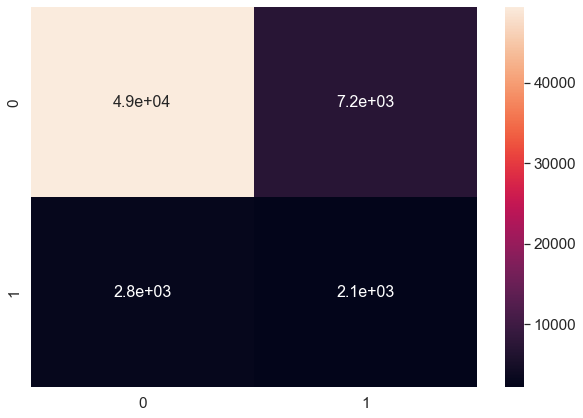

In [17]:
# prediction
y_pred = np.array(grid_search.best_estimator_.predict(x_test))

# scoring
print(F"scoring du modèle : clfgrid \n")
print(classification_report(y_test, y_pred),"\n")

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print("\n")

### feature importance

In [18]:
grid_search.feature_names_in_

array(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_1

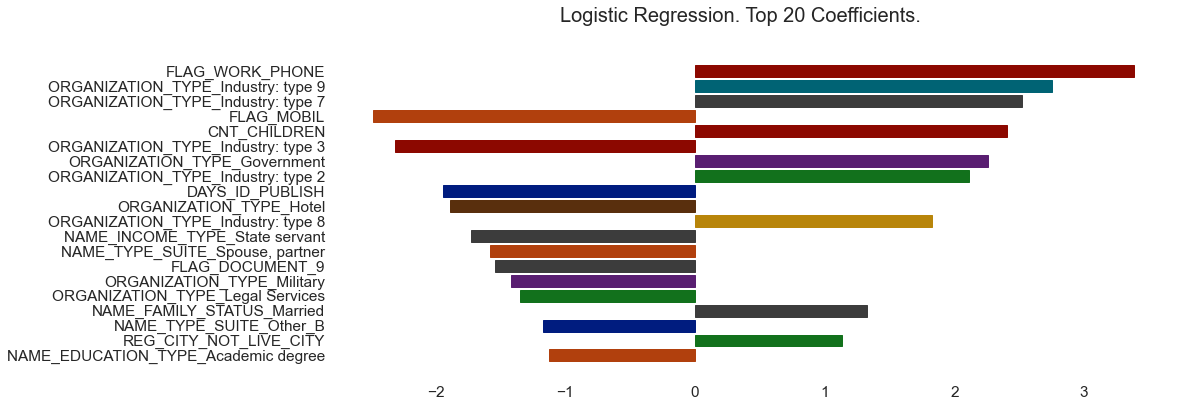

In [19]:
plt.figure(figsize=(15,6))
logistic_reg_coeff = grid_search.best_estimator_["classifier"].coef_
color_list =  sns.color_palette("dark", len(grid_search.feature_names_in_)) 
top_x = 20
logistic_reg_coeff = grid_search.best_estimator_["classifier"].coef_[0]
idx = np.argsort(np.abs(logistic_reg_coeff))[::-1] 
lreg_ax = plt.barh(grid_search.feature_names_in_[idx[:top_x]][::-1], logistic_reg_coeff[idx[:top_x]][::-1])
for i,bar in enumerate(lreg_ax):
  bar.set_color(color_list[idx[:top_x][::-1][i]])
  plt.box(False) 
lr_title = plt.suptitle("Logistic Regression. Top " + str(top_x) + " Coefficients.", fontsize=20, fontweight="normal")

### Optimisation LR

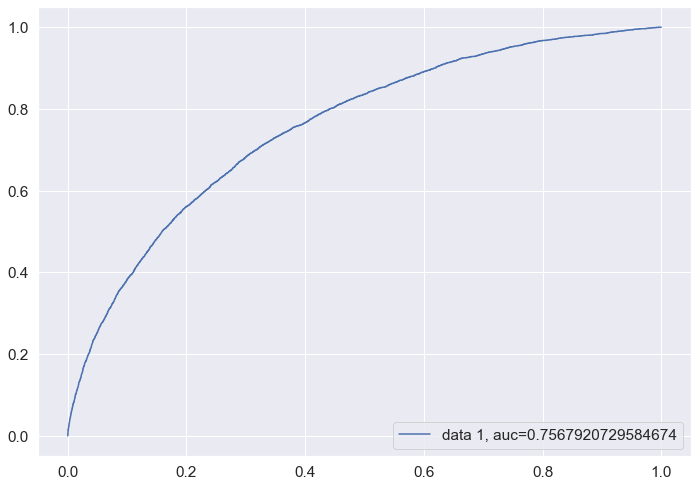

In [20]:
from sklearn import metrics
y_pred_proba = grid_search.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
from sklearn.metrics import roc_curve
def find_best_threshold(threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(x_test)[:,1])

In [23]:
best_thresholds = find_best_threshold(thresholds, fpr, tpr)

the maximum value of tpr*(1-fpr) 0.47871812957133314 for threshold 0.325


In [24]:
import joblib
# save the model to disk
filename = 'finalized_pipeline.pkl'
joblib.dump(grid_search, open(filename, 'wb'))

In [27]:
import joblib
model = joblib.load(r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\finalized_pipeline.pkl')

In [30]:
model.predict(x_test).sum()

9525

### lime explanation

In [63]:
from lime.lime_tabular import LimeTabularExplainer
import time

def get_lime_explainer(model, data, labels):  

    cat_feat_ix = [i for i,c in enumerate(model.feature_names_in_) if pd.api.types.is_categorical_dtype(data[c])]
    feat_names = list(model.feature_names_in_)
    class_names = list(pd.Series(labels).unique())
    data = np.array(data)

    
    lime_explainer = LimeTabularExplainer(data,
                                      feature_names=feat_names,
                                      class_names=class_names,
                                      categorical_features=cat_feat_ix ,
                                      mode="classification",
                                      kernel_width = np.sqrt(len(feat_names))*10
                                      )
    return lime_explainer

def lime_explain(explainer, data, predict_method, num_features):
    explanation = explainer.explain_instance(data, predict_method, num_features=num_features) 
    return explanation

lime_data_explainations = []
lime_metrics = []
lime_explanation_time = []
feat_names = list(x_train.columns)
test_data_index = 6
scaler = model.best_estimator_["col_transformer"]
scaled_test_data = scaler.transform(x_test)
predict_method = model.best_estimator_["classifier"].predict_proba 
 
start_time = time.time()
# explain first sample from test data
top_x = 10
#print("scaled_test_data[test_data_index]",scaled_test_data[test_data_index])
lime_explainer = get_lime_explainer(model, x_train, y_train)
explanation = lime_explain(lime_explainer,scaled_test_data[test_data_index], predict_method, top_x) 
elapsed_time = time.time() - start_time 



ex_holder = {}
for feat_index,ex in explanation.as_map()[1] :
    ex_holder[feat_names[feat_index]] = ex

lime_data_explainations.append(ex_holder) 
actual_pred = predict_method(scaled_test_data[test_data_index].reshape(1,-1))
perc_pred_diff =  abs(actual_pred[0][1] - explanation.local_pred[0])   
lime_explanation_time.append({"time": elapsed_time, "model": "pipeline + logReg"})
lime_metrics.append({"lime class1": explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,3), "model": "pipeline + logReg" })
# break 

In [64]:
# Plot run time for explanations
pd.DataFrame(lime_metrics)  


,lime class1,actual class1,class_diff,model
0,1.018876,0.097848,0.921,pipeline + logReg


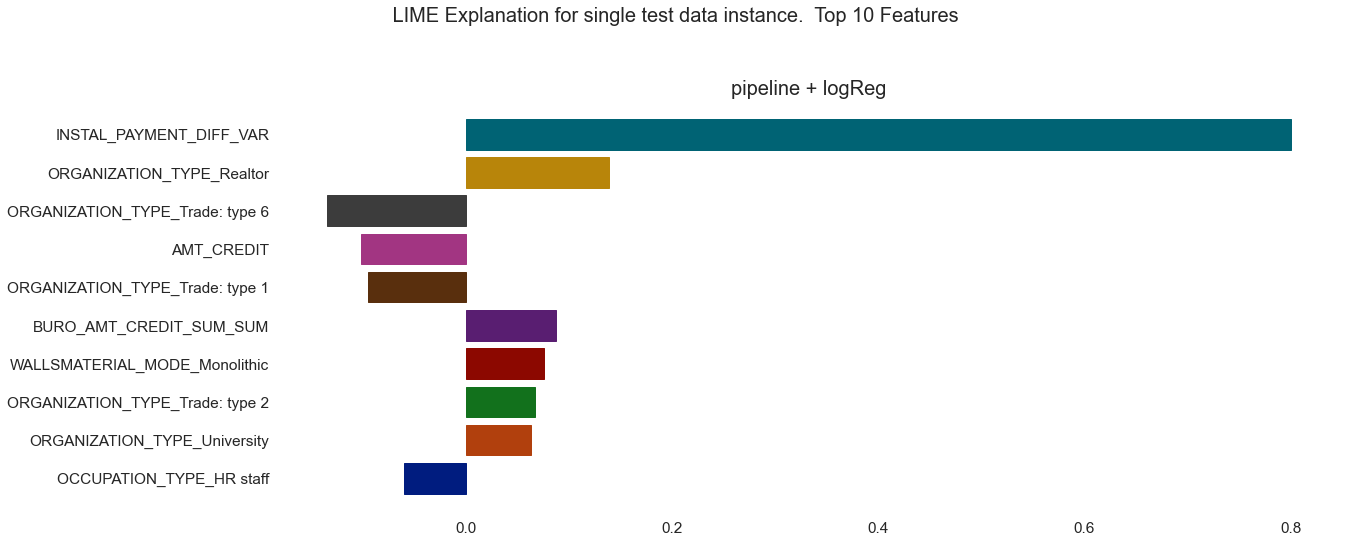

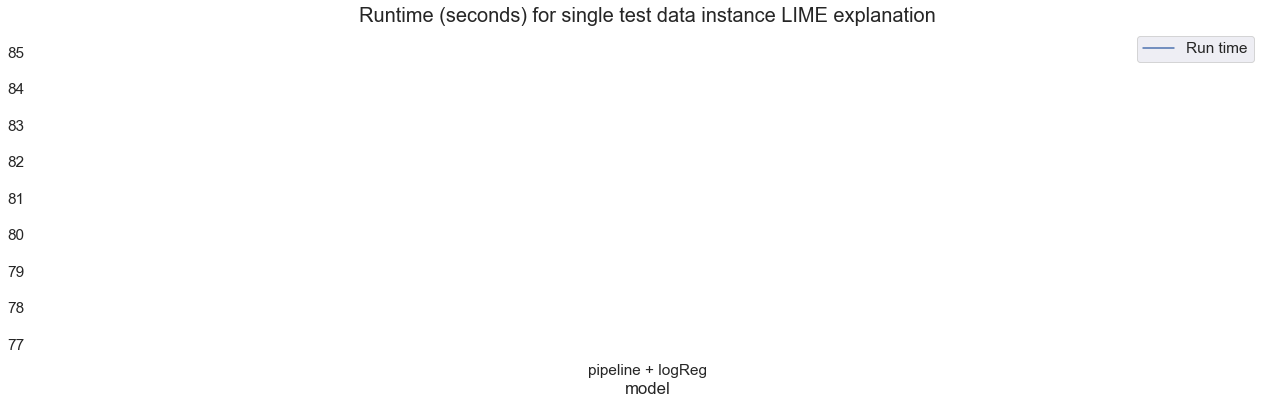

In [65]:
def plot_lime_exp(fig, fig_index, exp_data, title):
    features =  list(exp_data.keys())[::-1]
    explanations = list(exp_data.values())[::-1]
    ax = fig.add_subplot(fig_index) 
    lime_bar = ax.barh( features, explanations ) 
    ax.set_title(title, fontsize = 20)
    color_list =  sns.color_palette("dark", len(features)) 
    for i,bar in enumerate(lime_bar):
        bar.set_color(color_list[list(features).index(features[i])])
        plt.box(False)
        
fig = plt.figure(figsize=(19,8))

# Plot lime explanations for trained models

fig_index = 111
plot_lime_exp(fig, fig_index, lime_data_explainations[0], "pipeline + logReg")

plt.suptitle( " LIME Explanation for single test data instance.  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot run time for explanations
lx_df = pd.DataFrame(lime_explanation_time)
lx_df.sort_values("time", inplace=True)
lx_ax = lx_df.plot(kind="line", x="model", title="Runtime (seconds) for single test data instance LIME explanation", figsize=(22,6))
lx_ax.title.set_size(20)
lx_ax.legend(["Run time"])
plt.box(False)

In [33]:
lime_data_explainations[0].keys()

dict_keys(['INSTAL_PAYMENT_DIFF_VAR', 'FLAG_DOCUMENT_10', 'ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_Telecom', 'ORGANIZATION_TYPE_Transport: type 3', 'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house', 'BURO_AMT_CREDIT_SUM_SUM', 'ORGANIZATION_TYPE_Trade: type 1', 'ORGANIZATION_TYPE_Police'])

In [34]:
explanation

In [35]:
df_map = pd.DataFrame(explanation.as_list())

In [36]:
df_map

,0,1
0,INSTAL_PAYMENT_DIFF_VAR <= 0.00,0.806785
1,FLAG_DOCUMENT_10=0,0.216699
2,ORGANIZATION_TYPE_University=0,-0.144321
3,ORGANIZATION_TYPE_Telecom=0,0.139913
4,ORGANIZATION_TYPE_Transport: type 3=0,-0.107239
5,HOUSETYPE_MODE_specific housing=0,0.107006
6,HOUSETYPE_MODE_terraced house=0,0.099225
7,BURO_AMT_CREDIT_SUM_SUM <= 425484.00,0.077462
8,ORGANIZATION_TYPE_Trade: type 1=0,-0.068498
9,ORGANIZATION_TYPE_Police=1,0.031134


In [37]:
"ORGANIZATION_TYPE_Trade: type 1=0"
"INSTAL_PAYMENT_DIFF_VAR <= 0.00"

'INSTAL_PAYMENT_DIFF_VAR <= 0.00'

In [6]:
def clean_map(string):
    '''nettoyage des caractères de liste en sortie de LIME as_list'''
    signes = ['=>','<=','<','>',"="]
    for signe in signes :
        if signe in string :
            signe_confirme = signe
        string = string.replace(signe, '____')
    string = string.split('____')
    if string[0][-1] == ' ':
        string[0] = string[0][:-1]
    print(string)
    print(signe_confirme)

    return (string, signe_confirme)

In [8]:
clean_map("ORGANIZATION_TYPE_Trade: type 1=0")[0][0]

['ORGANIZATION_TYPE_Trade: type 1', '0']
=


'ORGANIZATION_TYPE_Trade: type 1'

In [173]:
import re
motif = 
test = df_map[0][0]
re.sub(motif,'',test)



'INSTALPAYMENTDIFFVAR'

In [178]:
df_map[0].apply(lambda x :re.sub(r"[^a-zA-Z]",'',x) )

0             INSTALPAYMENTDIFFVAR
1                        AMTCREDIT
2      WALLSMATERIALMODEMonolithic
3    FONDKAPREMONTMODEnotspecified
4          ORGANIZATIONTYPETelecom
5         ORGANIZATIONTYPEReligion
6        OCCUPATIONTYPESecretaries
7        ORGANIZATIONTYPETradetype
8     HOUSETYPEMODEspecifichousing
9          ORGANIZATIONTYPERealtor
Name: 0, dtype: object

In [38]:
!pip install dill

In [66]:
import dill
explainer_filename = "lime_explainer.pkl"
with open(explainer_filename, 'wb') as f: dill.dump(lime_explainer, f)

In [78]:
x_train.select_dtypes(include = np.number).columns[:79]

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_CREDIT_PERC',
       'BURO_DAYS_CREDIT_MIN', 'BURO_DAYS_CREDIT_MAX', 'BURO_DAYS_CREDIT_MEAN',
       'BURO_DAYS_CREDIT_VAR', 'BURO_DAYS_CREDIT_ENDDATE_MIN',
       'BURO_DAYS_CREDIT_ENDDATE_MAX', 'BURO_DAYS_CREDIT_ENDDATE_MEAN',
       'BURO_DAYS_CREDIT_UPDATE_MEAN', 'BURO_CREDIT_DAY_OVERDUE_MAX',
       'BURO_CREDIT_DAY_OVERDUE_MEAN', 'BURO_AMT_CREDIT_SUM_MAX',
       'BURO_AMT_CREDIT_SUM_MEAN', 'BURO_AMT_CREDIT_SUM_SUM',
       'BURO_AMT_CREDIT_SUM_DEBT_MAX', 'BURO_AMT_CREDIT_SUM_DEBT_MEAN',
       'BURO_AMT_CREDIT_S